___
# PROJETO 1

## <font color='red'>André Ejzenmesser</font>
___

## <font color='blue'>Liderando a Família</font>

## Introdução

Como ultimamente, a sociedade tem grandes conflitos ideologicos e politicos é importante ver e entender como e se ouveram mudanças nas pessoas e na cultura. Para isso, os grupos escolhidos para comparação foram os aposentados de dois anos diferentes (2011 e 2014) e as diferenças entre as quantidades de homens e mulheres que são chefes de famílias e aposentados para ver se há relação com o sexo da pessoa ou não e também suas idades. Para isso, foram usadas comparações como renda, estado civil, região que mora (Norte, Sul etc.), anos de estudo e quanto ganho pela aposentadoria.

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.


___
## Análise e Resultados

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/AndreEjz/Desktop/CD/Projeto 1


____
# PNAD 2014

In [6]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_csv("PNAD_e_Dicionario_2014/PES2014.csv", sep=",")

In [7]:
estrutura.head() 

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [8]:
#Para facilitar as buscas
pnad14 = pd.DataFrame()

In [9]:
#Pegando as váriaveis
#Qualitativas:
pnad14['regiao'] = estrutura.UF #Unidade Federal
pnad14['sexo'] = estrutura.V0302 #Sexo
pnad14['posicao_familiar'] = estrutura.V0402 #Posição referente na família (Pessoa de referência == líder da família)
pnad14['estado_civil'] = estrutura.V4011 #Estado civil
pnad14['aposentado'] = estrutura.V9122 #Aposentado

#Quantitativas
pnad14['renda'] = estrutura.V4750 #Renda mensal familiar per capta
pnad14['idade'] = estrutura.V8005 #Idade
pnad14['INSS'] = estrutura.V1252 #Renda inss

In [10]:
pnad14.head(10)

,regiao,sexo,posicao_familiar,estado_civil,aposentado,renda,idade,INSS
0,11,2,1,0.0,4.0,500.0,27,NaN
1,11,4,2,0.0,4.0,500.0,28,NaN
2,11,2,3,NaN,NaN,500.0,1,NaN
3,11,2,1,0.0,4.0,1150.0,51,NaN
4,11,4,2,0.0,4.0,1150.0,43,NaN
5,11,4,1,7.0,2.0,724.0,77,724.0
6,11,4,1,NaN,4.0,1700.0,39,NaN
7,11,2,2,NaN,4.0,1700.0,60,NaN
8,11,4,3,0.0,4.0,1700.0,16,NaN
9,11,2,3,0.0,4.0,1700.0,15,NaN


In [11]:
pnad14.sexo = pnad14.sexo.astype('category')
pnad14.posicao_familiar = pnad14.posicao_familiar.astype('category')
pnad14.estado_civil = pnad14.estado_civil.astype('category')
pnad14.aposentado = pnad14.aposentado.astype('category')

In [12]:
pnad14.sexo.cat.categories = ('Masculino','Feminino')
pnad14.posicao_familiar.cat.categories = ('Chefe','Conjuge','Filho','Outro_parente','Agregado','Pensionista','Empregado_domestico','Parente_do_empregado')
pnad14.estado_civil.cat.categories = ('Solteiro','Casado','Desquitado','Divorciado','Viuvo')
pnad14.aposentado.cat.categories = ('Sim','Nao')

In [13]:
#11>= até <=17 --->>> Norte
#21>= até <=29 --->>> Nordeste
#31>= até <=35 --->>> Sudeste
#41>= até <=43 --->>> Sul
#50>= até <=53 --->>> Centro-oeste
def unid_fed(uf):
    if 11<=uf<=17:
        return ('Norte')
    elif 21<=uf<=29:
        return ('Nordeste')
    elif 31<=uf<=35:
        return ('Sudeste')
    elif 41<=uf<=43:
        return ('Sul')
    elif 50<=uf<=53:
        return ('Centro-oeste')
    else:
        return ('NaN')

pnad14.regiao = pnad14.regiao.map(unid_fed)
pnad14.regiao = pnad14.regiao.astype('category')

In [14]:
pnad14.head(10)

,regiao,sexo,posicao_familiar,estado_civil,aposentado,renda,idade,INSS
0,Norte,Masculino,Chefe,Solteiro,Nao,500.0,27,NaN
1,Norte,Feminino,Conjuge,Solteiro,Nao,500.0,28,NaN
2,Norte,Masculino,Filho,NaN,NaN,500.0,1,NaN
3,Norte,Masculino,Chefe,Solteiro,Nao,1150.0,51,NaN
4,Norte,Feminino,Conjuge,Solteiro,Nao,1150.0,43,NaN
5,Norte,Feminino,Chefe,Viuvo,Sim,724.0,77,724.0
6,Norte,Feminino,Chefe,NaN,Nao,1700.0,39,NaN
7,Norte,Masculino,Conjuge,NaN,Nao,1700.0,60,NaN
8,Norte,Feminino,Filho,Solteiro,Nao,1700.0,16,NaN
9,Norte,Masculino,Filho,Solteiro,Nao,1700.0,15,NaN


___
# PNAD 2011

In [15]:
dados_11 = pd.read_csv("PNAD_e_Dicionario_2011/PES2011.csv", sep=",")

In [16]:
pnad11 = pd.DataFrame()

#Pegando as váriaveis
#Qualitativas:
pnad11['regiao'] = dados_11.UF #Unidade Federal
pnad11['sexo'] = dados_11.V0302 #Sexo
pnad11['posicao_familiar'] = dados_11.V0402 #Posição referente na família (Pessoa de referência == líder da família)
pnad11['estado_civil'] = dados_11.V4011 #Estado civil
pnad11['aposentado'] = dados_11.V9122 #Aposentado

#Quantitativas
pnad11['renda'] = dados_11.V4750 #Renda mensal familiar per capta
pnad11['idade'] = dados_11.V8005 #Idade
pnad11['INSS'] = dados_11.V1252 #Renda INSS

pnad11.head(10)

,regiao,sexo,posicao_familiar,estado_civil,aposentado,renda,idade,INSS
0,11,2,1,NaN,4.0,1.000000e+12,49,NaN
1,11,4,2,NaN,4.0,1.000000e+12,33,NaN
2,11,4,3,0.0,4.0,1.000000e+12,15,NaN
3,11,2,3,NaN,NaN,1.000000e+12,9,NaN
4,11,4,1,1.0,4.0,1.461000e+03,51,NaN
5,11,2,2,1.0,4.0,1.461000e+03,22,NaN
6,11,4,4,0.0,4.0,1.461000e+03,17,NaN
7,11,4,4,0.0,4.0,1.461000e+03,10,NaN
8,11,4,1,0.0,4.0,1.000000e+12,30,NaN
9,11,4,3,0.0,4.0,1.000000e+12,11,NaN


In [17]:
#Transformando os categoricos
pnad11.sexo = pnad11.sexo.astype('category')
pnad11.posicao_familiar = pnad11.posicao_familiar.astype('category')
pnad11.estado_civil = pnad11.estado_civil.astype('category')
pnad11.aposentado = pnad11.aposentado.astype('category')

In [18]:
#Dando valores
pnad11.sexo.cat.categories = ('Masculino','Feminino')
pnad11.posicao_familiar.cat.categories = ('Chefe','Conjuge','Filho','Outro_parente','Agregado','Pensionista','Empregado_domestico','Parente_do_empregado')
pnad11.estado_civil.cat.categories = ('Solteiro','Casado','Desquitado','Divorciado','Viuvo')
pnad11.aposentado.cat.categories = ('Sim','Nao')

#11>= até <=17 --->>> Norte
#21>= até <=29 --->>> Nordeste
#31>= até <=35 --->>> Sudeste
#41>= até <=43 --->>> Sul
#50>= até <=53 --->>> Centro-oeste
def unid_fed(uf):
    if 11<=uf<=17:
        return ('Norte')
    elif 21<=uf<=29:
        return ('Nordeste')
    elif 31<=uf<=35:
        return ('Sudeste')
    elif 41<=uf<=43:
        return ('Sul')
    elif 50<=uf<=53:
        return ('Centro-oeste')
    else:
        return ('NaN')

pnad11.regiao = pnad11.regiao.map(unid_fed)
pnad11.regiao = pnad11.regiao.astype('category')

In [19]:
#Imprimindo
pnad11.head(10)

,regiao,sexo,posicao_familiar,estado_civil,aposentado,renda,idade,INSS
0,Norte,Masculino,Chefe,NaN,Nao,1.000000e+12,49,NaN
1,Norte,Feminino,Conjuge,NaN,Nao,1.000000e+12,33,NaN
2,Norte,Feminino,Filho,Solteiro,Nao,1.000000e+12,15,NaN
3,Norte,Masculino,Filho,NaN,NaN,1.000000e+12,9,NaN
4,Norte,Feminino,Chefe,Casado,Nao,1.461000e+03,51,NaN
5,Norte,Masculino,Conjuge,Casado,Nao,1.461000e+03,22,NaN
6,Norte,Feminino,Outro_parente,Solteiro,Nao,1.461000e+03,17,NaN
7,Norte,Feminino,Outro_parente,Solteiro,Nao,1.461000e+03,10,NaN
8,Norte,Feminino,Chefe,Solteiro,Nao,1.000000e+12,30,NaN
9,Norte,Feminino,Filho,Solteiro,Nao,1.000000e+12,11,NaN


___
# Analisando as variáveis

## Análise 1

Analisando a posição familiar pelo sexo da pessoa, e comparando dois anos diferentes. Com isso, será possível ver qual a relação entre a quantidade de chefes de familias pelo sexo.

### Em 2014

In [20]:
regioes = pnad14.regiao
sexos = pnad14.sexo
posicoes_familiares = pnad14.posicao_familiar
EC = pnad14.estado_civil
aposentados = pnad14.aposentado
rendas = pnad14.renda
idades = pnad14.idade

In [21]:
#Tabela de aposentados ou não pela posicao familiar
apos_pos_fam14 = pd.crosstab(posicoes_familiares,aposentados,normalize=True)
soma = apos_pos_fam14.sum().sum()
apos_pos_fam14*100/soma

aposentado,Sim,Nao
posicao_familiar,,
Chefe,8.085681,31.935040
Conjuge,3.062602,21.850713
Filho,0.210097,27.582026
Outro_parente,0.991785,5.646633
Agregado,0.035604,0.417307
Pensionista,0.004491,0.127020
Empregado_domestico,0.004811,0.044265
Parente_do_empregado,0.000000,0.001925


In [22]:
#Tabela do sexo dos aposentados pela posicao familiar
sexo_apos_pos_fam14 = pd.crosstab(pnad14.posicao_familiar,pnad14[aposentados=='Sim'].sexo,normalize=True)
soma = sexo_apos_pos_fam14.sum().sum()
sexo_apos_pos_fam14*100/soma

sexo,Masculino,Feminino
posicao_familiar,,
Chefe,39.254199,25.978832
Conjuge,6.544523,18.163704
Filho,0.866910,0.828093
Outro_parente,2.401470,5.599979
Agregado,0.121626,0.165619
Pensionista,0.018115,0.018115
Empregado_domestico,0.000000,0.038817
Parente_do_empregado,0.000000,0.000000


### Em 2011

In [23]:
#Tabela de aposentados ou não pela posicao familiar
apos_pos_fam11 = pd.crosstab(pnad11.posicao_familiar,pnad11.aposentado,normalize=True)
soma = apos_pos_fam11.sum().sum()
apos_pos_fam11*100/soma

aposentado,Sim,Nao
posicao_familiar,,
Chefe,7.378285,31.150506
Conjuge,2.765140,22.033787
Filho,0.233863,29.123587
Outro_parente,0.978298,5.578033
Agregado,0.031400,0.468707
Pensionista,0.003925,0.135738
Empregado_domestico,0.007196,0.106955
Parente_do_empregado,0.000327,0.004252


In [24]:
#Tabela do sexo dos aposentados pela posicao familiar
sexo_apos_pos_fam11 = pd.crosstab(pnad11.posicao_familiar,pnad11[(pnad11.aposentado=='Sim')].sexo,normalize=True)
soma = sexo_apos_pos_fam11.sum().sum()
sexo_apos_pos_fam11*100/soma

sexo,Masculino,Feminino
posicao_familiar,,
Chefe,39.877758,24.852937
Conjuge,6.014520,18.244426
Filho,1.067462,0.984246
Outro_parente,2.714569,5.868174
Agregado,0.111911,0.163563
Pensionista,0.020087,0.014348
Empregado_domestico,0.002870,0.060260
Parente_do_empregado,0.000000,0.002870


### Juntando os anos

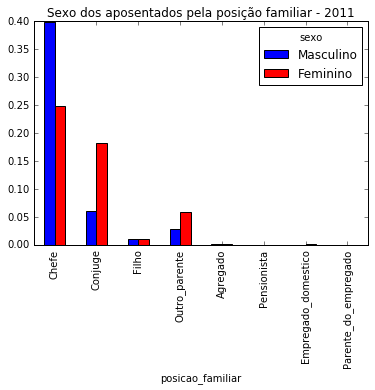

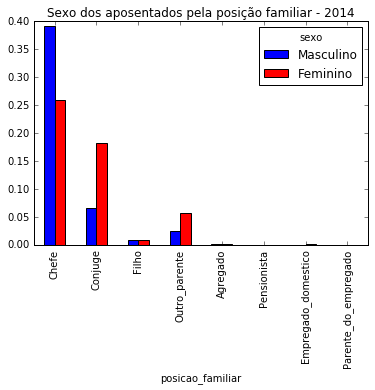

In [25]:
sexo_apos_pos_fam11.plot(kind='bar', color=('blue', 'red','yellow','green','orange','salmon','black','#7352FF'), legend=True, title='Sexo dos aposentados pela posição familiar - 2011')
sexo_apos_pos_fam14.plot(kind='bar', color=('blue', 'red','yellow','green','orange','salmon','black','#7352FF'), legend=True, title='Sexo dos aposentados pela posição familiar - 2014')

In [66]:
#Tabela do sexo pela posicao familiar
sexo_pos_fam11 = pd.crosstab(pnad11.posicao_familiar,pnad11.sexo,normalize=True)
soma = sexo_pos_fam11.sum().sum()
sexo_pos_fam11*100/soma

sexo,Masculino,Feminino
posicao_familiar,,
Chefe,20.242729,12.576932
Conjuge,4.074736,17.049529
Filho,20.378414,17.700373
Outro_parente,3.464013,3.818410
Agregado,0.235708,0.231529
Pensionista,0.070768,0.052101
Empregado_domestico,0.006687,0.091386
Parente_do_empregado,0.003343,0.003343


In [67]:
#Tabela do sexo pela posicao familiar
sexo_pos_fam14 = pd.crosstab(pnad14.posicao_familiar,pnad14.sexo,normalize=True)
soma = sexo_pos_fam14.sum().sum()
sexo_pos_fam14*100/soma

sexo,Masculino,Feminino
posicao_familiar,,
Chefe,20.358109,14.048871
Conjuge,4.828377,16.590326
Filho,19.434571,16.747788
Outro_parente,3.560684,3.844446
Agregado,0.210133,0.217579
Pensionista,0.068666,0.046329
Empregado_domestico,0.003861,0.038331
Parente_do_empregado,0.000827,0.001103


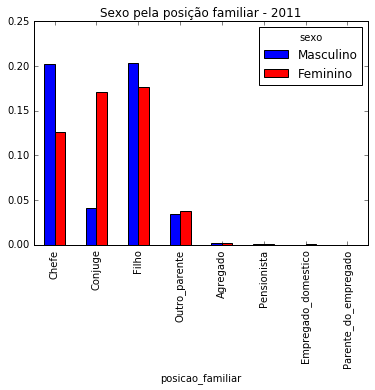

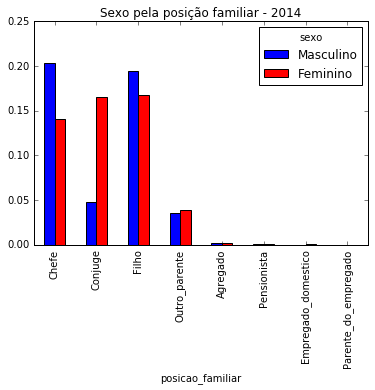

In [69]:
sexo_pos_fam11.plot(kind='bar', color=('blue', 'red','yellow','green','orange','salmon','black','#7352FF'), legend=True, title='Sexo pela posição familiar - 2011')
sexo_pos_fam14.plot(kind='bar', color=('blue', 'red','yellow','green','orange','salmon','black','#7352FF'), legend=True, title='Sexo pela posição familiar - 2014')

## Conclusão 1:

Com esta análise, é possível observar que em ambos os anos quem lidera as famílias, dos aposentados, são os homens.

Olhando de um contexto geral, os aposentados são apenas uma pequena parte da liderança de suas familias. Grande parte é liderada por pessoas não aposentadas, e mesmo assim, a grande parte esta preenchida por homens.

___
## Análise 2

Nesta analise será possível observar qual a tendência para o futuro, saber se as quantidades sobre a chefia das famílias entre os sexos tendem a se igualar com o tempo

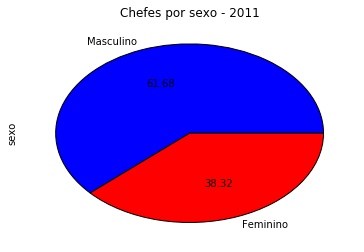

In [26]:
chefes_sexo11 = pnad11[(pnad11.posicao_familiar=='Chefe')].sexo.value_counts(True)*100
chefes_sexo11.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False, title='Chefes por sexo - 2011')

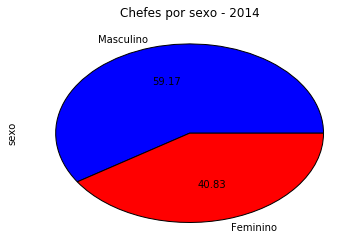

In [27]:
chefes_sexo14 = pnad14[(pnad14.posicao_familiar=='Chefe')].sexo.value_counts(True)*100
chefes_sexo14.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False, title='Chefes por sexo - 2014')

## Conclusão 2:

Com esta analise, é possível observar que a tendência ao longo do tempo foi de diminuir a diferença entre homens e mulheres na liderança de suas familias. Isso mostra uma possível mudança de pensamento ideologico nas pessoas.

____
## Análise 3

Analisando posição familiar com os diferentes estados civis e ver a relação de sexo. Com isso será possível observar se as mulheres que lideram suas famílias são casadas ou não, indicando assim que caso a maioria não seja casada, o motivo da liderança pode ser por falta de uma presença masculina.

In [28]:
#Posicao familiar pelo estado civil --- apenas dos aposentados
pos_fam_ec11 = pd.crosstab(pnad11[pnad11.aposentado=='Sim'].posicao_familiar,pnad11.estado_civil,normalize=True)
soma = pos_fam_ec11.sum().sum()
pos_fam_ec11*100/soma

estado_civil,Solteiro,Casado,Desquitado,Divorciado,Viuvo
posicao_familiar,,,,,
Chefe,18.873685,6.824607,4.930453,8.074183,31.369445
Conjuge,4.676015,2.176863,0.378831,0.887708,1.181726
Filho,3.256813,0.118738,0.152663,0.265747,0.180934
Outro_parente,4.953070,0.672849,0.542802,0.938595,8.820536
Agregado,0.254439,0.016963,0.011308,0.067850,0.180934
Pensionista,0.033925,0.011308,0.005654,0.000000,0.016963
Empregado_domestico,0.073504,0.016963,0.005654,0.005654,0.016963
Parente_do_empregado,0.000000,0.000000,0.000000,0.000000,0.005654


In [29]:
pos_fam_ec14 = pd.crosstab(pnad14[pnad14.aposentado=='Sim'].posicao_familiar,pnad14.estado_civil,normalize=True)
soma = pos_fam_ec14.sum().sum()
pos_fam_ec14*100/soma

estado_civil,Solteiro,Casado,Desquitado,Divorciado,Viuvo
posicao_familiar,,,,,
Chefe,20.161902,7.027574,3.475841,9.997470,31.323046
Conjuge,4.902606,1.760688,0.349102,1.143435,1.285100
Filho,2.428535,0.146724,0.126486,0.359221,0.187200
Outro_parente,4.295472,0.814571,0.409815,1.123198,7.993929
Agregado,0.222616,0.035416,0.040476,0.065773,0.182140
Pensionista,0.010119,0.000000,0.005059,0.030357,0.020238
Empregado_domestico,0.075892,0.000000,0.000000,0.000000,0.000000
Parente_do_empregado,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
#Quantos chefes de familias são mulheres casadas em ambos os anos
chefes_sexo11 = pd.crosstab(pnad11[(pnad11.aposentado=='Sim')&(pnad11.posicao_familiar=='Chefe')].sexo,pnad11.estado_civil,normalize=True)
soma = chefes_sexo11.sum().sum()
chefes_sexo11*100/soma

estado_civil,Solteiro,Casado,Desquitado,Divorciado,Viuvo
sexo,,,,,
Masculino,12.329541,6.132494,3.13080,5.107722,12.192367
Feminino,14.605019,3.606875,3.90543,6.414912,32.574841


In [31]:
chefes_sexo14 = pd.crosstab(pnad14[(pnad14.aposentado=='Sim')&(pnad14.posicao_familiar=='Chefe')].sexo,pnad14.estado_civil,normalize=True)
soma = chefes_sexo14.sum().sum()
chefes_sexo14*100/soma

estado_civil,Solteiro,Casado,Desquitado,Divorciado,Viuvo
sexo,,,,,
Masculino,12.362946,5.594602,2.213944,6.325555,12.018555
Feminino,15.645207,4.167838,2.614563,7.562553,31.494237


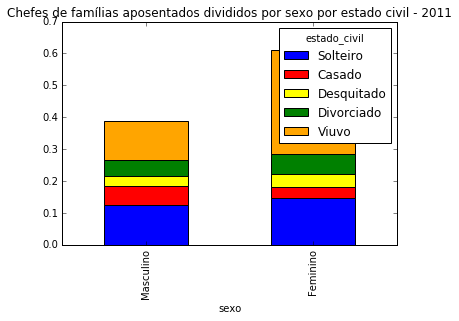

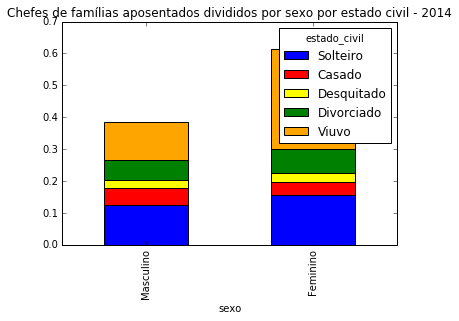

In [71]:
chefes_sexo11.plot(kind='bar', color=('blue', 'red','yellow','green','orange'),legend=True, title='Chefes de famílias aposentados divididos por sexo por estado civil - 2011',stacked=True)
chefes_sexo14.plot(kind='bar', color=('blue', 'red','yellow','green','orange'),legend=True, title='Chefes de famílias aposentados divididos por sexo por estado civil - 2014',stacked=True)

## Conclusão 3:

Com esta analise, foi possível comparar as diferenças entre os homens e as mulheres. É possível ver que das mulheres que são chefes de suas famílias, várias delas são por motivos de não terem um marido. E isso ocorre em ambos os anos analisados.

Apesar de ser pequena a diferença (observada nas tabelas), quando há um casal, o chefe é normalmente o homem ao invés da mulher.

Em ambos os gráficos resultantes, essa diferença se da pelo fato de que muitas das mulheres chefes são viuvas. E novamente, a diferença na quantidade de casados chefes aposentados entre homens e mulheres diminuiu.

____
## Análise 4:

Analisando a posição familiar pela unidade federal. Isso permite observar as tendencias de cada região do país. Observar onde há mudança e se há mudança de pensamento, já que o Brasil é um país com muitas diferenças nos pensamentos para as diferentes regiões.

In [72]:
#Tabela da posição familiar pelo sexo (apenas dos chefes de família) em 2011
pos_uf11 = pd.crosstab(pnad11[(pnad11.posicao_familiar=='Chefe')].sexo,pnad11.regiao,normalize=True)
soma = pos_uf11.sum().sum()
pos_uf11*100/soma

regiao,Centro-oeste,Nordeste,Norte,Sudeste,Sul
sexo,,,,,
Masculino,6.868654,17.274780,8.869571,18.403851,10.261809
Feminino,3.903358,11.276274,5.591871,11.160820,6.389012


In [34]:
#Tabela da posição familiar pelo sexo (apenas dos chefes de família) em 2014
pos_uf14 = pd.crosstab(pnad14[(pnad14.posicao_familiar=='Chefe')].sexo,pnad14.regiao,normalize=True)
soma = pos_uf14.sum().sum()
pos_uf14*100/soma

regiao,Centro-oeste,Nordeste,Norte,Sudeste,Sul
sexo,,,,,
Masculino,6.463945,15.729869,8.755380,18.390786,9.828563
Feminino,4.128429,12.324375,5.690516,12.057482,6.630653


In [35]:
#Tabela da posição familiar pelo sexo (apenas dos chefes de família e aposentados) em 2011
pos_uf112 = pd.crosstab(pnad11[(pnad11.posicao_familiar=='Chefe')&(pnad11.aposentado=='Sim')].sexo,pnad11.regiao,normalize=True)
soma = pos_uf112.sum().sum()
pos_uf112*100/soma

regiao,Centro-oeste,Nordeste,Norte,Sudeste,Sul
sexo,,,,,
Masculino,5.062506,16.845465,5.771788,21.619824,12.306056
Feminino,3.058782,12.589769,3.714868,11.623371,7.407572


In [36]:
#Tabela da posição familiar pelo sexo (apenas dos chefes de família e aposentados) em 2014
pos_uf142 = pd.crosstab(pnad14[(pnad14.posicao_familiar=='Chefe')&(pnad14.aposentado=='Sim')].sexo,pnad14.regiao,normalize=True)
soma = pos_uf142.sum().sum()
pos_uf142*100/soma

regiao,Centro-oeste,Nordeste,Norte,Sudeste,Sul
sexo,,,,,
Masculino,5.109489,15.324500,5.827515,21.354332,12.559505
Feminino,3.332275,12.595208,4.050301,12.182640,7.664234


Legenda:
Azul = Centro-oeste
Vermelho = Nordeste
Laranja = Norte
Verde = Sudeste
Amarelo = Sul


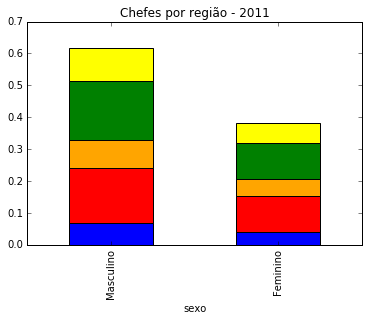

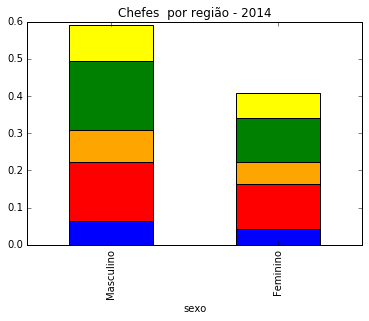

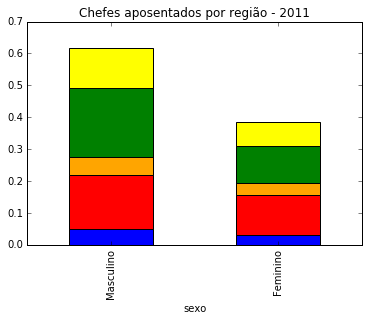

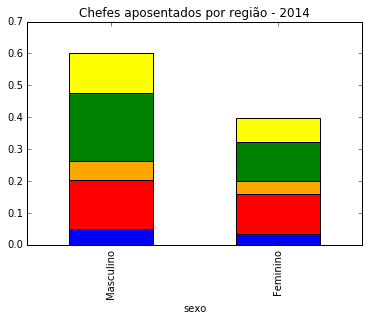

In [37]:
print('''Legenda:
Azul = Centro-oeste
Vermelho = Nordeste
Laranja = Norte
Verde = Sudeste
Amarelo = Sul''')

pos_uf11.plot(kind='bar', color=('blue', 'red','orange','green','yellow'),legend=False, title='Chefes por região - 2011',stacked=True)
pos_uf14.plot(kind='bar', color=('blue', 'red','orange','green','yellow'),legend=False, title='Chefes  por região - 2014',stacked=True)
pos_uf112.plot(kind='bar', color=('blue', 'red','orange','green','yellow'),legend=False, title='Chefes aposentados por região - 2011',stacked=True)
pos_uf142.plot(kind='bar', color=('blue', 'red','orange','green','yellow'),legend=False, title='Chefes aposentados por região - 2014',stacked=True)

## Conclusão 4:

Com esta análise é possível observar que existem diferença na liderança das familias nas diferentes regiões do país. Tais dados fazem ser possível perceber as tendências ideológicas ao longo do tempo, porém pelos dados dos gráficos e das tabelas, é claro ver que não ouveram tantas diferenças entre as diferentes regiões, já que em todas ouve um crescimento na liderança pelas mulheres, apesar de mesmo assim os homens serem maioria.

____
## Análise 5

Nesta análise será feita a comparação das idades entre os chefes de familias, aposentados ou não, fazendo com que de para ver se a diferença nas idades influênciam ou não na hora de ser o chefe da família.

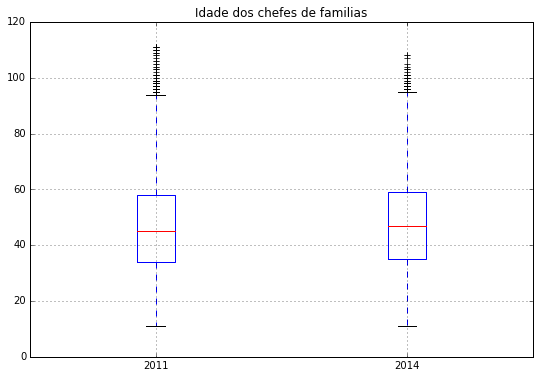

In [38]:
x = pnad11[(pnad11.posicao_familiar=='Chefe')].idade
y = pnad14[(pnad14.posicao_familiar=='Chefe')].idade
data_to_plot = [x,y]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
plt.title('Idade dos chefes de familias')
ax.set_xticklabels(['2011', '2014'])
plt.grid(True)

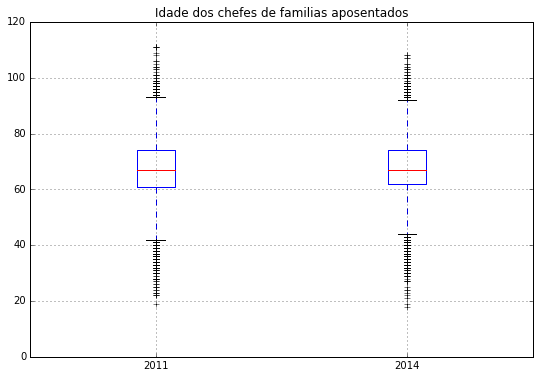

In [39]:
x = pnad11[(pnad11.posicao_familiar=='Chefe')&(pnad11.aposentado=='Sim')].idade
y = pnad14[(pnad14.posicao_familiar=='Chefe')&(pnad14.aposentado=='Sim')].idade
data_to_plot = [x,y]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
plt.title('Idade dos chefes de familias aposentados')
ax.set_xticklabels(['2011', '2014'])
plt.grid(True)

In [40]:
print('A média das idades dos chefes em 2011 é: ',pnad11[(pnad11.posicao_familiar=='Chefe')].idade.mean())
print('A média das idades dos chefes em 2014 é: ',pnad14[(pnad14.posicao_familiar=='Chefe')].idade.mean())
print()
print('A mediana das idades dos chefes em 2011 é: ',pnad11[(pnad11.posicao_familiar=='Chefe')].idade.median())
print('A mediana das idades dos chefes em 2014 é: ',pnad14[(pnad14.posicao_familiar=='Chefe')].idade.median())
print()
print('A média das idades dos chefes aposentados em 2011 é: ',pnad11[(pnad11.posicao_familiar=='Chefe')&(pnad11.aposentado=='Sim')].idade.mean())
print('A média das idades dos chefes aposentados em 2014 é: ',pnad14[(pnad14.posicao_familiar=='Chefe')&(pnad14.aposentado=='Sim')].idade.mean())
print()
print('A mediana das idades dos chefes aposentados em 2011 é: ',pnad11[(pnad11.posicao_familiar=='Chefe')&(pnad11.aposentado=='Sim')].idade.median())
print('A mediana das idades dos chefes aposentados em 2014 é: ',pnad14[(pnad14.posicao_familiar=='Chefe')&(pnad14.aposentado=='Sim')].idade.median())

A média das idades dos chefes em 2011 é:  46.78202995008319
A média das idades dos chefes em 2014 é:  47.75018634436439

A mediana das idades dos chefes em 2011 é:  45.0
A mediana das idades dos chefes em 2014 é:  47.0

A média das idades dos chefes aposentados em 2011 é:  67.36191151697845
A média das idades dos chefes aposentados em 2014 é:  67.82886385274516

A mediana das idades dos chefes aposentados em 2011 é:  67.0
A mediana das idades dos chefes aposentados em 2014 é:  67.0


## Conclusão 5:

Com esta análise é possível observar que a idade não influência se uma pessoa é chefe de familia ou não. Uma pessoa ter mais idade, ou seja, ser mais experiente, não significa muita coisa na liderança da familia. A liderença esta com pessoas mais jovens, pessoas com idades por volta de 50 anos de idade. Se olhar o boxplot de chefes, a idade média vai até os 60 anos, já se ohar o boxplot dos chefes aposentados, a média começa nos 60 anos. Indicando que os aposentados talvéz não tenham tanta relevância em suas famílias.

_____
## Análise 6

Nesta análise será feita a diferença das rendas entre os chefes de famílias homens e mulheres, e ver se existe relação com o dinheiro ou não.

In [41]:
pnad14_renda = pnad14[(pnad14.renda!=999999999999)&(~pnad14.renda.isnull())]

In [42]:
pnad14_renda.renda.describe()

count    349613.000000
mean       1017.840212
std        1659.043953
min           0.000000
25%         346.000000
50%         637.000000
75%        1100.000000
max      331200.000000
Name: renda, dtype: float64

In [43]:
quantidade_classes = np.sqrt(349613)
delta = 331200

amplitude_sugerida = delta/quantidade_classes
print(amplitude_sugerida)

560.139941351


In [44]:
#Caso não goste do resultado
amplitude_sugerida = 550
faixa = np.arange(0,15000,amplitude_sugerida)

In [45]:
varCat_renda = pd.cut(pnad14_renda.renda,faixa)
varCat_renda.value_counts()

(0, 550]          151669
(550, 1100]       106921
(1100, 1650]       39372
(1650, 2200]       17309
(2200, 2750]        8789
(2750, 3300]        5504
(3300, 3850]        3785
(3850, 4400]        2753
(4950, 5500]        1853
(4400, 4950]        1638
(5500, 6050]        1149
(6050, 6600]         795
(6600, 7150]         747
(7150, 7700]         505
(7700, 8250]         434
(8250, 8800]         358
(9900, 10450]        342
(8800, 9350]         280
(10450, 11000]       217
(9350, 9900]         176
(11550, 12100]       152
(12100, 12650]       119
(12650, 13200]       113
(11000, 11550]        92
(13200, 13750]        69
(13750, 14300]        67
(14300, 14850]        36
Name: renda, dtype: int64

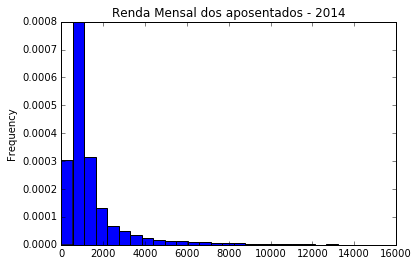

In [46]:
plot = pnad14_renda[pnad14_renda.aposentado=='Sim'].renda.plot.hist(bins=faixa, title='Renda Mensal dos aposentados - 2014', normed=1)

In [47]:
print('2014\n')
print('A média das rendas mensais é: ',pnad14_renda.renda.mean())
print('A média das rendas mensais dos aposentados é: ',pnad14_renda[pnad14_renda.aposentado=='Sim'].renda.mean())
print()
print('A mediana das rendas mensais é: ',pnad14_renda.renda.median())
print('A mediana das rendas mensais dos aposentados é: ',pnad14_renda[pnad14_renda.aposentado=='Sim'].renda.median())

2014

A média das rendas mensais é:  1017.8402118914343
A média das rendas mensais dos aposentados é:  1531.4806911119535

A mediana das rendas mensais é:  637.0
A mediana das rendas mensais dos aposentados é:  886.0


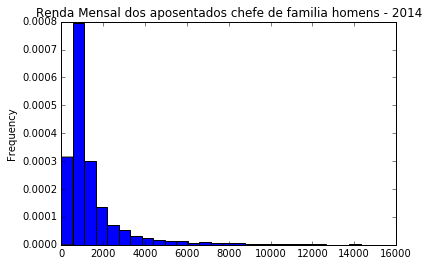

In [48]:
plot = pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Masculino')&(pnad14_renda.posicao_familiar=='Chefe')].renda.plot.hist(bins=faixa, title='Renda Mensal dos aposentados chefe de familia homens - 2014', normed=1)

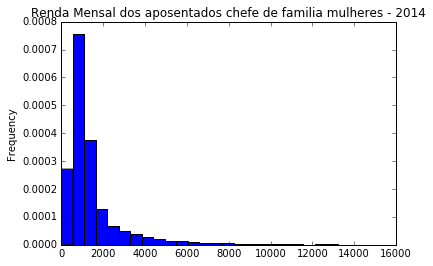

In [49]:
plot = pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Feminino')&(pnad14_renda.posicao_familiar=='Chefe')].renda.plot.hist(bins=faixa, title='Renda Mensal dos aposentados chefe de familia mulheres - 2014', normed=1)

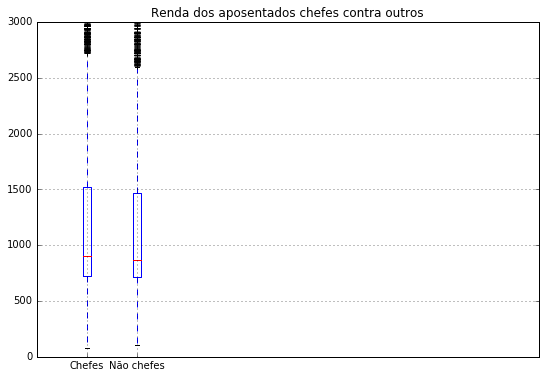

In [50]:
x = pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.posicao_familiar=='Chefe')].renda
y = pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.posicao_familiar!='Chefe')].renda
data_to_plot = [x,y]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
plt.title('Renda dos aposentados chefes contra outros')
ax.set_xticklabels(['Chefes', 'Não chefes'])
plt.axis([0,10,0,3000])
plt.grid(True)

In [51]:
print('Covariância femenina:',np.cov(pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Feminino')&(pnad14_renda.posicao_familiar=='Chefe')].idade,pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Feminino')&(pnad14_renda.posicao_familiar=='Chefe')].renda)[0,1])
print('Covariância masculino:',np.cov(pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Masculino')&(pnad14_renda.posicao_familiar=='Chefe')].idade,pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Masculino')&(pnad14_renda.posicao_familiar=='Chefe')].renda)[0,1])
print('Covariância geral:',np.cov(pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.posicao_familiar=='Chefe')].idade,pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.posicao_familiar=='Chefe')].renda)[0,1])

Covariância femenina: -600.985365886
Covariância masculino: -525.615679512
Covariância geral: -550.387336145


In [52]:
print('Correlação femenina:',np.corrcoef(pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Feminino')&(pnad14_renda.posicao_familiar=='Chefe')].idade,pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Feminino')&(pnad14_renda.posicao_familiar=='Chefe')].renda)[0,1])
print('Correlação masculino:',np.corrcoef(pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Masculino')&(pnad14_renda.posicao_familiar=='Chefe')].idade,pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.sexo=='Masculino')&(pnad14_renda.posicao_familiar=='Chefe')].renda)[0,1])
print('Correlação geral:',np.corrcoef(pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.posicao_familiar=='Chefe')].idade,pnad14_renda[(pnad14_renda.aposentado=='Sim')&(pnad14_renda.posicao_familiar=='Chefe')].renda)[0,1])

Correlação femenina: -0.0282377465479
Correlação masculino: -0.0150696047174
Correlação geral: -0.0181678791643


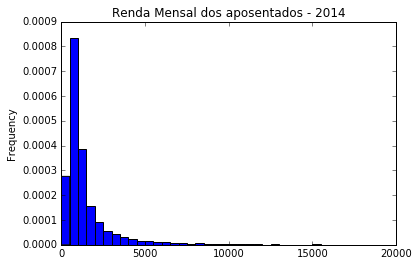

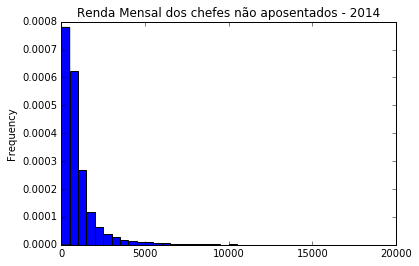

In [78]:
plot = pnad14_renda[pnad14_renda.aposentado=='Sim'].renda.plot.hist(bins=faixa, title='Renda Mensal dos aposentados - 2014', normed=1)
plt.show()
plot = pnad14_renda[pnad14_renda.aposentado=='Nao'].renda.plot.hist(bins=faixa, title='Renda Mensal dos chefes não aposentados - 2014', normed=1)
plt.show()

## Conclusão 6:

Não existe tanta diferença na renda dos chefes aposentados entre homens e mulheres, concluindo que esse não deve ser um fator influente.

Na comparação de renda dos aposentados contra os não aposentados, também não se ve muitas diferenças nos valores, concluindo também que a renda pode não ser um valor influente na liderança da família.

## Análise 7

Nesta análise será possível observar a relação que se tem com o dinheiro recebido pela aposentadoria de cada um com a posição familiar. Vendo assim se existe relação na liderança com o dinheiro.

In [53]:
pnad14_inss = pnad14[(pnad14.INSS!=999999999999)&(~pnad14.INSS.isnull())]

In [55]:
pnad14_inss.INSS.describe()

count    38020.000000
mean      1368.243766
std       1781.906239
min        610.000000
25%        724.000000
50%        724.000000
75%       1300.000000
max      36000.000000
Name: INSS, dtype: float64

In [56]:
quantidade_classes = np.sqrt(38020)
delta = 36000-610

amplitude_sugerida = delta/quantidade_classes
print(amplitude_sugerida)

181.49911276


In [57]:
#Caso não goste do resultado
amplitude_sugerida = 500
faixa = np.arange(0,20000,amplitude_sugerida)

In [58]:
varCat_renda = pd.cut(pnad14_renda.renda,faixa)
varCat_renda.value_counts()

(0, 500]          138942
(500, 1000]       108973
(1000, 1500]       43937
(1500, 2000]       19521
(2000, 2500]        9791
(2500, 3000]        6241
(3000, 3500]        4080
(3500, 4000]        3184
(4000, 4500]        1983
(4500, 5000]        1835
(5500, 6000]        1131
(5000, 5500]        1106
(6000, 6500]         735
(6500, 7000]         728
(7000, 7500]         517
(7500, 8000]         397
(9500, 10000]        353
(8500, 9000]         344
(8000, 8500]         325
(9000, 9500]         186
(10000, 10500]       156
(11500, 12000]       148
(10500, 11000]       131
(12500, 13000]       116
(12000, 12500]       109
(14500, 15000]        97
(11000, 11500]        86
(13500, 14000]        70
(13000, 13500]        64
(15500, 16000]        50
(16500, 17000]        43
(14000, 14500]        42
(15000, 15500]        42
(17000, 17500]        26
(16000, 16500]        24
(17500, 18000]        23
(18500, 19000]        22
(18000, 18500]        17
(19000, 19500]        15
Name: renda, dtype: int64

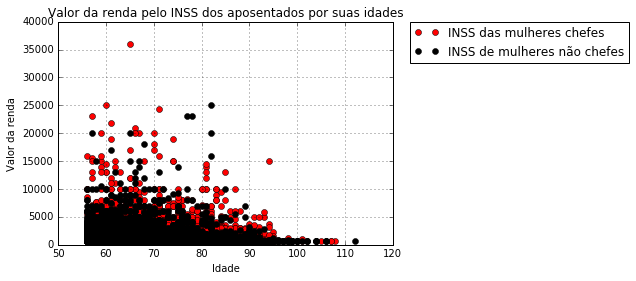

In [59]:
#Gráfico da diferença entre as rendas de homens e mulheres aposentados chefes de familia
x = pnad14_inss[(pnad14_inss.idade>55)&(pnad14_inss.sexo=='Feminino')&(pnad14_inss.aposentado=='Sim')&(pnad14_inss.posicao_familiar=='Chefe')].idade
y = pnad14_inss[(pnad14_inss.idade>55)&(pnad14_inss.sexo=='Feminino')&(pnad14_inss.aposentado=='Sim')&(pnad14_inss.posicao_familiar=='Chefe')].INSS
plt.plot(x,y,'ro',label='INSS das mulheres chefes')
plt.plot(pnad14_inss[(pnad14_inss.idade>55)&(pnad14_inss.sexo=='Feminino')&(pnad14_inss.aposentado=='Sim')&(pnad14_inss.posicao_familiar!='Chefe')].idade,pnad14_inss[(pnad14_inss.idade>55)&(pnad14_inss.sexo=='Feminino')&(pnad14_inss.aposentado=='Sim')&(pnad14_inss.posicao_familiar!='Chefe')].INSS,'ko',label='INSS de mulheres não chefes')
plt.title('Valor da renda pelo INSS dos aposentados por suas idades')
plt.xlabel('Idade')
plt.ylabel('Valor da renda')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0)
plt.show()

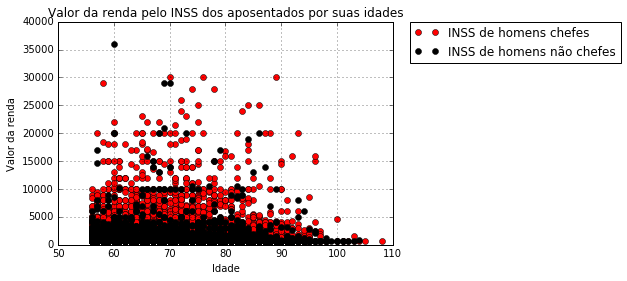

In [60]:
#Gráfico da diferença entre as rendas de homens e mulheres aposentados chefes de familia
x = pnad14_inss[(pnad14_inss.idade>55)&(pnad14_inss.sexo=='Masculino')&(pnad14_inss.aposentado=='Sim')&(pnad14_inss.posicao_familiar=='Chefe')].idade
y = pnad14_inss[(pnad14_inss.idade>55)&(pnad14_inss.sexo=='Masculino')&(pnad14_inss.aposentado=='Sim')&(pnad14_inss.posicao_familiar=='Chefe')].INSS
plt.plot(x,y,'ro',label='INSS de homens chefes')
plt.plot(pnad14_inss[(pnad14_inss.idade>55)&(pnad14_inss.sexo=='Masculino')&(pnad14_inss.aposentado=='Sim')&(pnad14_inss.posicao_familiar!='Chefe')].idade,pnad14_inss[(pnad14_inss.idade>55)&(pnad14_inss.sexo=='Masculino')&(pnad14_inss.aposentado=='Sim')&(pnad14_inss.posicao_familiar!='Chefe')].INSS,'ko',label='INSS de homens não chefes')
plt.title('Valor da renda pelo INSS dos aposentados por suas idades')
plt.xlabel('Idade')
plt.ylabel('Valor da renda')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0)
plt.show()

Coeficiente angular a:  -7.33095774683
Coeficiente linear b:  1862.33122955


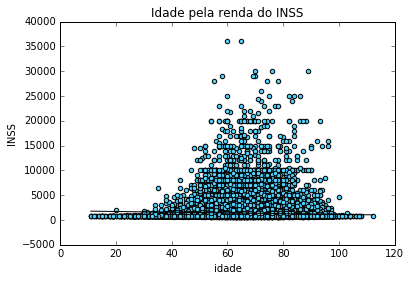

In [83]:
def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color='#50D4FF',title="Idade pela renda do INSS")

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='k')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
scatter_and_line(pnad14_inss, "idade", "INSS")

## Conclusão 7:

Com esses gráficos é possível dizer que quanto maior a idade de uma pessoa, menor será o valor recebido pelo INSS por ela. Se essa pessoa for do sexo feminino, seu valor será ainda menor que o dos homens na mesma idade. Além disso, é possível perceber que no gráfico dos homens, os que são chefes tendem a ganhar mais que os homens não chefes. No gráfico das mulheres esta relação não acontece com tanta frequência.

Pela linha de tendências no último gráfico, é possível perceber que num geral (homens e mulheres) tendem a ganhar menos conforme a idade cresce.

___
# Conclusão 

### Depois de analisar diversas váriaveis das PNAD2011 e PNAD2014 pode chegar algumas conclusões:

- Os aposentados podem ter menos importância nas grandes decisões de sua familias, já que, visto por vários pontos, a maioria da liderança é dada por pessoas não aposentadas, por volta dos 40 anos de idade.
- Dos aposentados, é possível ver que vários são do sexo masculino, muito provavelmente por fatores históricos. Porém com a análise dos dados ao longo dos anos, essa tendência vem diminuindo, apesar de ser bem lenta. Concluindo assim que as visões e ideologias da sociedade vem mudando, tendendo para uma igualdade entre os sexos.
- Observando as rendas, a conclusão é que elas não influênciam nas diferentes lideranças, já que ambos aposentados e não aposentados, chefes de família tem as representações gráficas muito parecidas, ou seja, os valores de renda não importam muito.
- Dos valores arrecadados pela aposentadoria (obtidos pelo INSS), dos homens, há influencia na quantidade que ganham quando comparados com os chefes e não chefes. Já nas mulheres não há essa influência.

### Finalizando:

Os aposentados são um grupo de pessoas que historicamente não são tão privilegiados, e o fato de não serem os chefes de suas famílias, em muitos casos, pode fazer com que esse fator seja agravado.

Já entre os aposentados homens e mulheres, há diferença na liderança por motivos históricos e ideologicos, como visto nos gráficos de regiões e até do estado civil, que diz se uma pessoa é ou não comprometida com outra. Mas ao mesmo tempo, como visto no gráfico de pizza, essa tendência esta sofrendo mudanças, fazendo as diferenças entre os sexos serem cada vez menores.